# Análisis de ventas a través de los comportamientos del consumidor

## Motivación


El conjunto de datos es una muestra de transacciones realizadas en una tienda. Nos gustaría conocer mejor el comportamiento de compra del cliente frente a diferentes productos. Un primer problema es, entonces, predecir el monto de la compra de un usuario con la ayuda de la información contenida en las otras variables.


El problema de clasificación también se puede resolver en este conjunto de datos, ya que varias variables son categóricas y algunos otros enfoques podrían ser por ejemplo “Predecir la edad del consumidor” o incluso “Predecir la categoría de los bienes comprados”.


Este conjunto de datos también es particularmente conveniente para agrupar y quizás encontrar diferentes grupos de consumidores dentro de él como así también ser capaces de generar recomendaciones de productos.

## Breve exploración del dataset

El dataset *retail_sales.zip* se encuentra en el siguiente classroom: https://classroom.google.com/u/0/c/MzE2MDE2MTY4NzBa descargarlo y descomprimirlo.

In [82]:
import pandas as pd
import seaborn
import matplotlib as plt
import numpy as np


### Cargamos el dataset

In [6]:
retail_sales = pd.read_csv('retail_sales.csv')

In [3]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


In [7]:
retail_sales.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
447438,1002929,P00081142,M,18-25,2,A,4+,0,6,8.0,14.0,165.21
171113,1002422,P00184442,F,51-55,9,C,3,1,1,6.0,8.0,115.97
388856,1005837,P00104942,M,26-35,7,B,0,1,5,NaN,NaN,87.78
365233,1002158,P00285742,M,26-35,12,A,1,1,8,NaN,NaN,77.62
204013,1001471,P00108442,M,26-35,17,B,1,0,5,NaN,NaN,70.93


### Descripción de las columnas:

- $\textit{User_ID}$: identificador unívoco de cada usuario.
- $\textit{Product_ID}$: identificador unívoco de cada producto.
- $\textit{Gender}$: género del usuario, F $\rightarrow$ Femenino, M $\rightarrow$ Masculino.
- $\textit{Age}$: edad del usuario representada por rangos, es decir, no se conoce la edad exacta del usuario sino el rango de edad al cual pertenece.
- $\textit{Occupation}$: ocupación del usuario, existen 21 ocupaciones distintas, cada una de ellas está identificada con un número del 0 al 20.
- $\textit{City_Category}$: categoría de ciudad en la que vive el usuario, existen 3 categorías: A - B - C.
- $\textit{Stay_In_Current_City_Years}$: tiempo de permanecia del usuario en la ciudad actual expresada en años. Nota: el valor 0 significa que el tiempo de permanencia del usuario en esa ciudad ha sido menor a un año, no es un valor inválido.
- $\textit{Marital_Status}$: estado civil del usuario, valor 0 $\rightarrow$ Soltero, valor 1 $\rightarrow$ Casado
- $\textit{Product_Category_1}$: categoria 1 del producto.
- $\textit{Product_Category_2}$: categoria 2 del producto, probablemente sea una subcategoria de 1.
- $\textit{Product_Category_3}$: categoria 3 del producto, probablemente sea una subcategoria de 2.
- $\textit{Purchase}$: precio que el usuario pagó por el producto expresado en dólares.

Se sacan las columnas de las categorías 2 y 3 del producto

In [9]:
dataset=retail_sales.drop(["Product_Category_2","Product_Category_3"],axis=1)

In [12]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,93.338599
std,1.714393e+03,6.52412,0.491612,3.750701,49.810221
min,1.000001e+06,0.00000,0.000000,1.000000,1.850000
25%,1.001495e+06,2.00000,0.000000,1.000000,58.660000
50%,1.003031e+06,7.00000,0.000000,5.000000,80.620000
75%,1.004417e+06,14.00000,1.000000,8.000000,120.730000
max,1.006040e+06,20.00000,1.000000,18.000000,239.610000


In [14]:
dataset.mode()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1001680,P00265242,M,26-35,4,B,1,0,5,68.55


## Calcular estadísticos: media, mediana, moda, desviación estándar, valor mínimo, valor máximo de la cantidad de compras por usuario. Gráficar. A qué distribución conocida corresponde? Qué se puede concluir?

In [20]:
user_purch=dataset.groupby("User_ID").size()

In [24]:
user_purch.describe()

count    5891.000000
mean       91.253947
std       105.929800
min         5.000000
25%        25.000000
50%        53.000000
75%       114.000000
max      1025.000000
dtype: float64

In [26]:
user_purch.mode()

0    17
dtype: int64

(0, 1116.6209571460904)

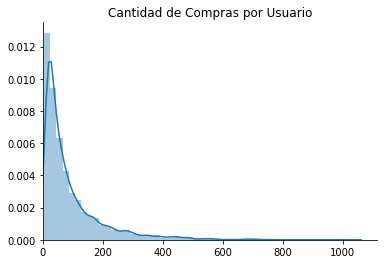

In [47]:
seaborn.distplot(user_purch,rug=False)
seaborn.despine()
plt.pyplot.title("Cantidad de Compras por Usuario")
plt.pyplot.xlim(0,None)

La cantidad de compras por usuario es marcadamente asimétrica derecha, lo que es señal de que esta variable sigue una distribución exponencial. Esto significa que el comportamiento más repetido (la moda) es una pequeña cantidad de compras (17), y que las compras de mayores cantidades son cada vez más extrañas entre los usuarios. Se puede observar además en base a la mediana, que la mitad de los usuarios compró como máximo 53 veces, aunque el promedio de compras sea de 91.25. Este último valor es afectado por la clara asimetría de la distribución, por lo que no es una buena medida representativa de los datos.

Text(0.5,1,'BoxPlot - Cantidad de Compras por Usuario')

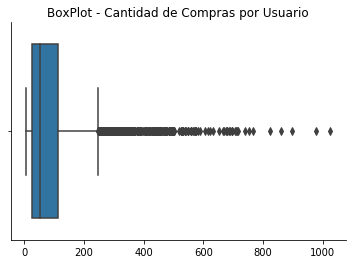

In [68]:
seaborn.boxplot(user_purch)
seaborn.despine()
plt.pyplot.title("BoxPlot - Cantidad de Compras por Usuario")

El resultado del boxplot es el esperado para una distribución exponencial, en el que se encuentra una gran cantidad de "valores atípicos" en los valores altos de la serie, esto en realidad se debe a la asimetría de los datos. En estos casos el usual boxplot no es de gran utilidad en la detección de outliers. 

## Calcular media, mediana, desviación estándar, valor mínimo, valor máximo de los valores de compras. Determinar valores atípicos (outliers) y graficar. El porcentaje de valores atípicos es muy alto? Analizar por género, edad, ocupación de los consumidores.

In [48]:
purch_value=dataset["Purchase"]

In [53]:
purch_value.describe()

count    537577.000000
mean         93.338599
std          49.810221
min           1.850000
25%          58.660000
50%          80.620000
75%         120.730000
max         239.610000
Name: Purchase, dtype: float64

In [54]:
 purch_value.mode()

0    68.55
dtype: float64

Text(0.5,1,'Valor de las Compras')

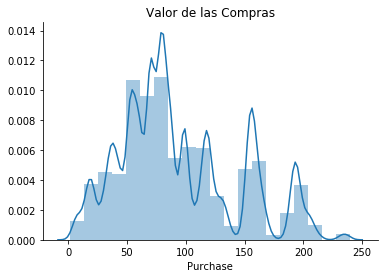

In [71]:
seaborn.distplot(purch_value,bins=20)
seaborn.despine()
plt.pyplot.title("Valor de las Compras")

Como se ve en el gráfico, los datos no siguen una distribución normal en todo su rango. Probablemente entre el rango 0-150 podría asimilarse a una función normal, pero viendo la serie en su totalidad, esta presenta una asimetría derecha.

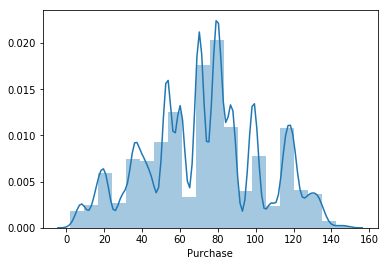

In [81]:
seaborn.distplot(purch_value[purch_value < 150],bins=20)

Text(0.5,1,'Boxplot - Valor de las Compras')

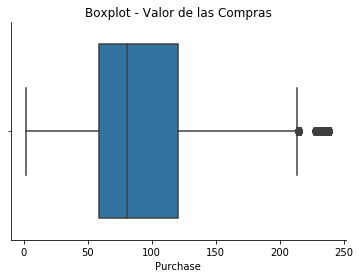

In [69]:
seaborn.boxplot(purch_value)
seaborn.despine()
plt.pyplot.title("Boxplot - Valor de las Compras")

In [86]:
q1=np.percentile(purch_value,25)

In [87]:
q3=np.percentile(purch_value,75)

In [88]:
iqr=q3-q1

In [93]:
print( "Cantidad de valores mayores al limite superior :",len(purch_value[purch_value > q3+iqr*1.5]))

Cantidad de valores mayores al limite superior : 2665


In [125]:
print ("Porcentaje de valores atípicos: ",len(purch_value[purch_value > q3+iqr*1.5])/len(purch_value))

Porcentaje de valores atípicos:  0.004957429354306453


In [94]:
purch_out=dataset[dataset["Purchase"]> q3+iqr*1.5]

Text(0.5,1,'Cantidad de Outliers por Género')

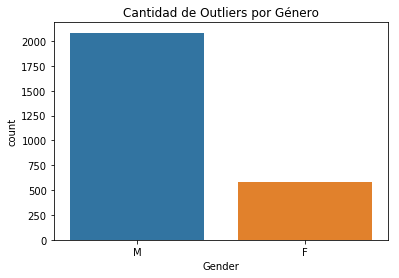

In [124]:
seaborn.countplot(x="Gender",data=purch_out)
plt.pyplot.title("Cantidad de Outliers por Género")


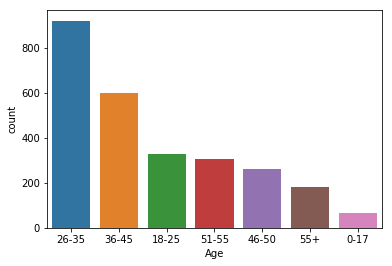

In [115]:
seaborn.countplot(x="Age",data=purch_out,order = purch_out['Age'].value_counts().index)
plt.pyplot.title("Cantidad de Outliers por Edad")


Text(0.5,1,'Cantidad de Outliers por Ocupación')

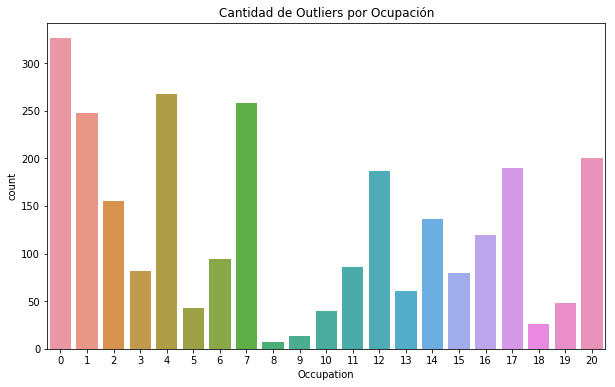

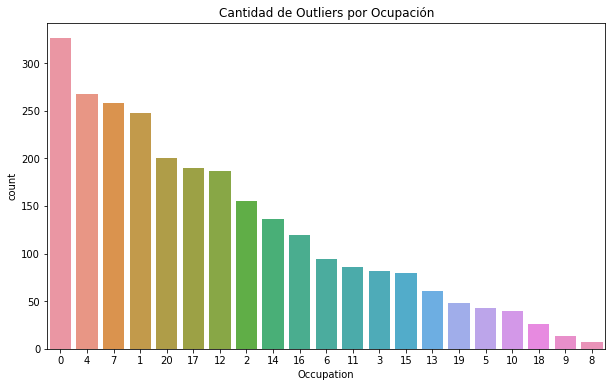

In [123]:
plt.pyplot.figure(figsize=(10,6))
seaborn.countplot(x="Occupation",data=purch_out)
plt.pyplot.title("Cantidad de Outliers por Ocupación")

plt.pyplot.figure(figsize=(10,6))
seaborn.countplot(x="Occupation",data=purch_out,order = purch_out['Occupation'].value_counts().index)
plt.pyplot.title("Cantidad de Outliers por Ocupación (Ordenado)")


In [ ]:
seaborn.countplot(x="Occupation",data=purch_out,order = purch_out['Occupation'].value_counts().index)

## Top productos más vendidos, a qué categorias pertenecen? (tener en cuenta solo la columna Product_Category_1). Estos productos son consumidos por usuarios de todas las edades o algunos rangos en particular? Graficar productos más vendidos por edad y por género.

In [134]:
prod_sold=pd.DataFrame(dataset.groupby("Product_ID").size())

In [142]:
top_10=prod_sold.sort_values(0,ascending=False)[0:9]

In [143]:
top_10

,0
Product_ID,
P00265242,1858
P00110742,1591
P00025442,1586
P00112142,1539
P00057642,1430
P00184942,1424
P00046742,1417
P00058042,1396
P00145042,1384
